In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from random import seed, randrange
import numpy as np

sns.set_theme(palette="bright")

plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc("legend", fontsize=20)

if not os.path.exists("figures"):
    os.makedirs("figures")

In [2]:
claim_folder = os.path.join("data","gridCalc")

claims = []
for filename in os.listdir(claim_folder):
    if filename.endswith(".csv"):
        filename = os.path.join(claim_folder, filename)
        claims.append(pd.read_csv(filename))

df = pd.concat(claims)

df["diff"] = df.weightedAfterAlgorithm - df.weighted
diff_text = "diff = weighted average after algorithm - weighted average before algorithm"
figure_suffix = "algo"

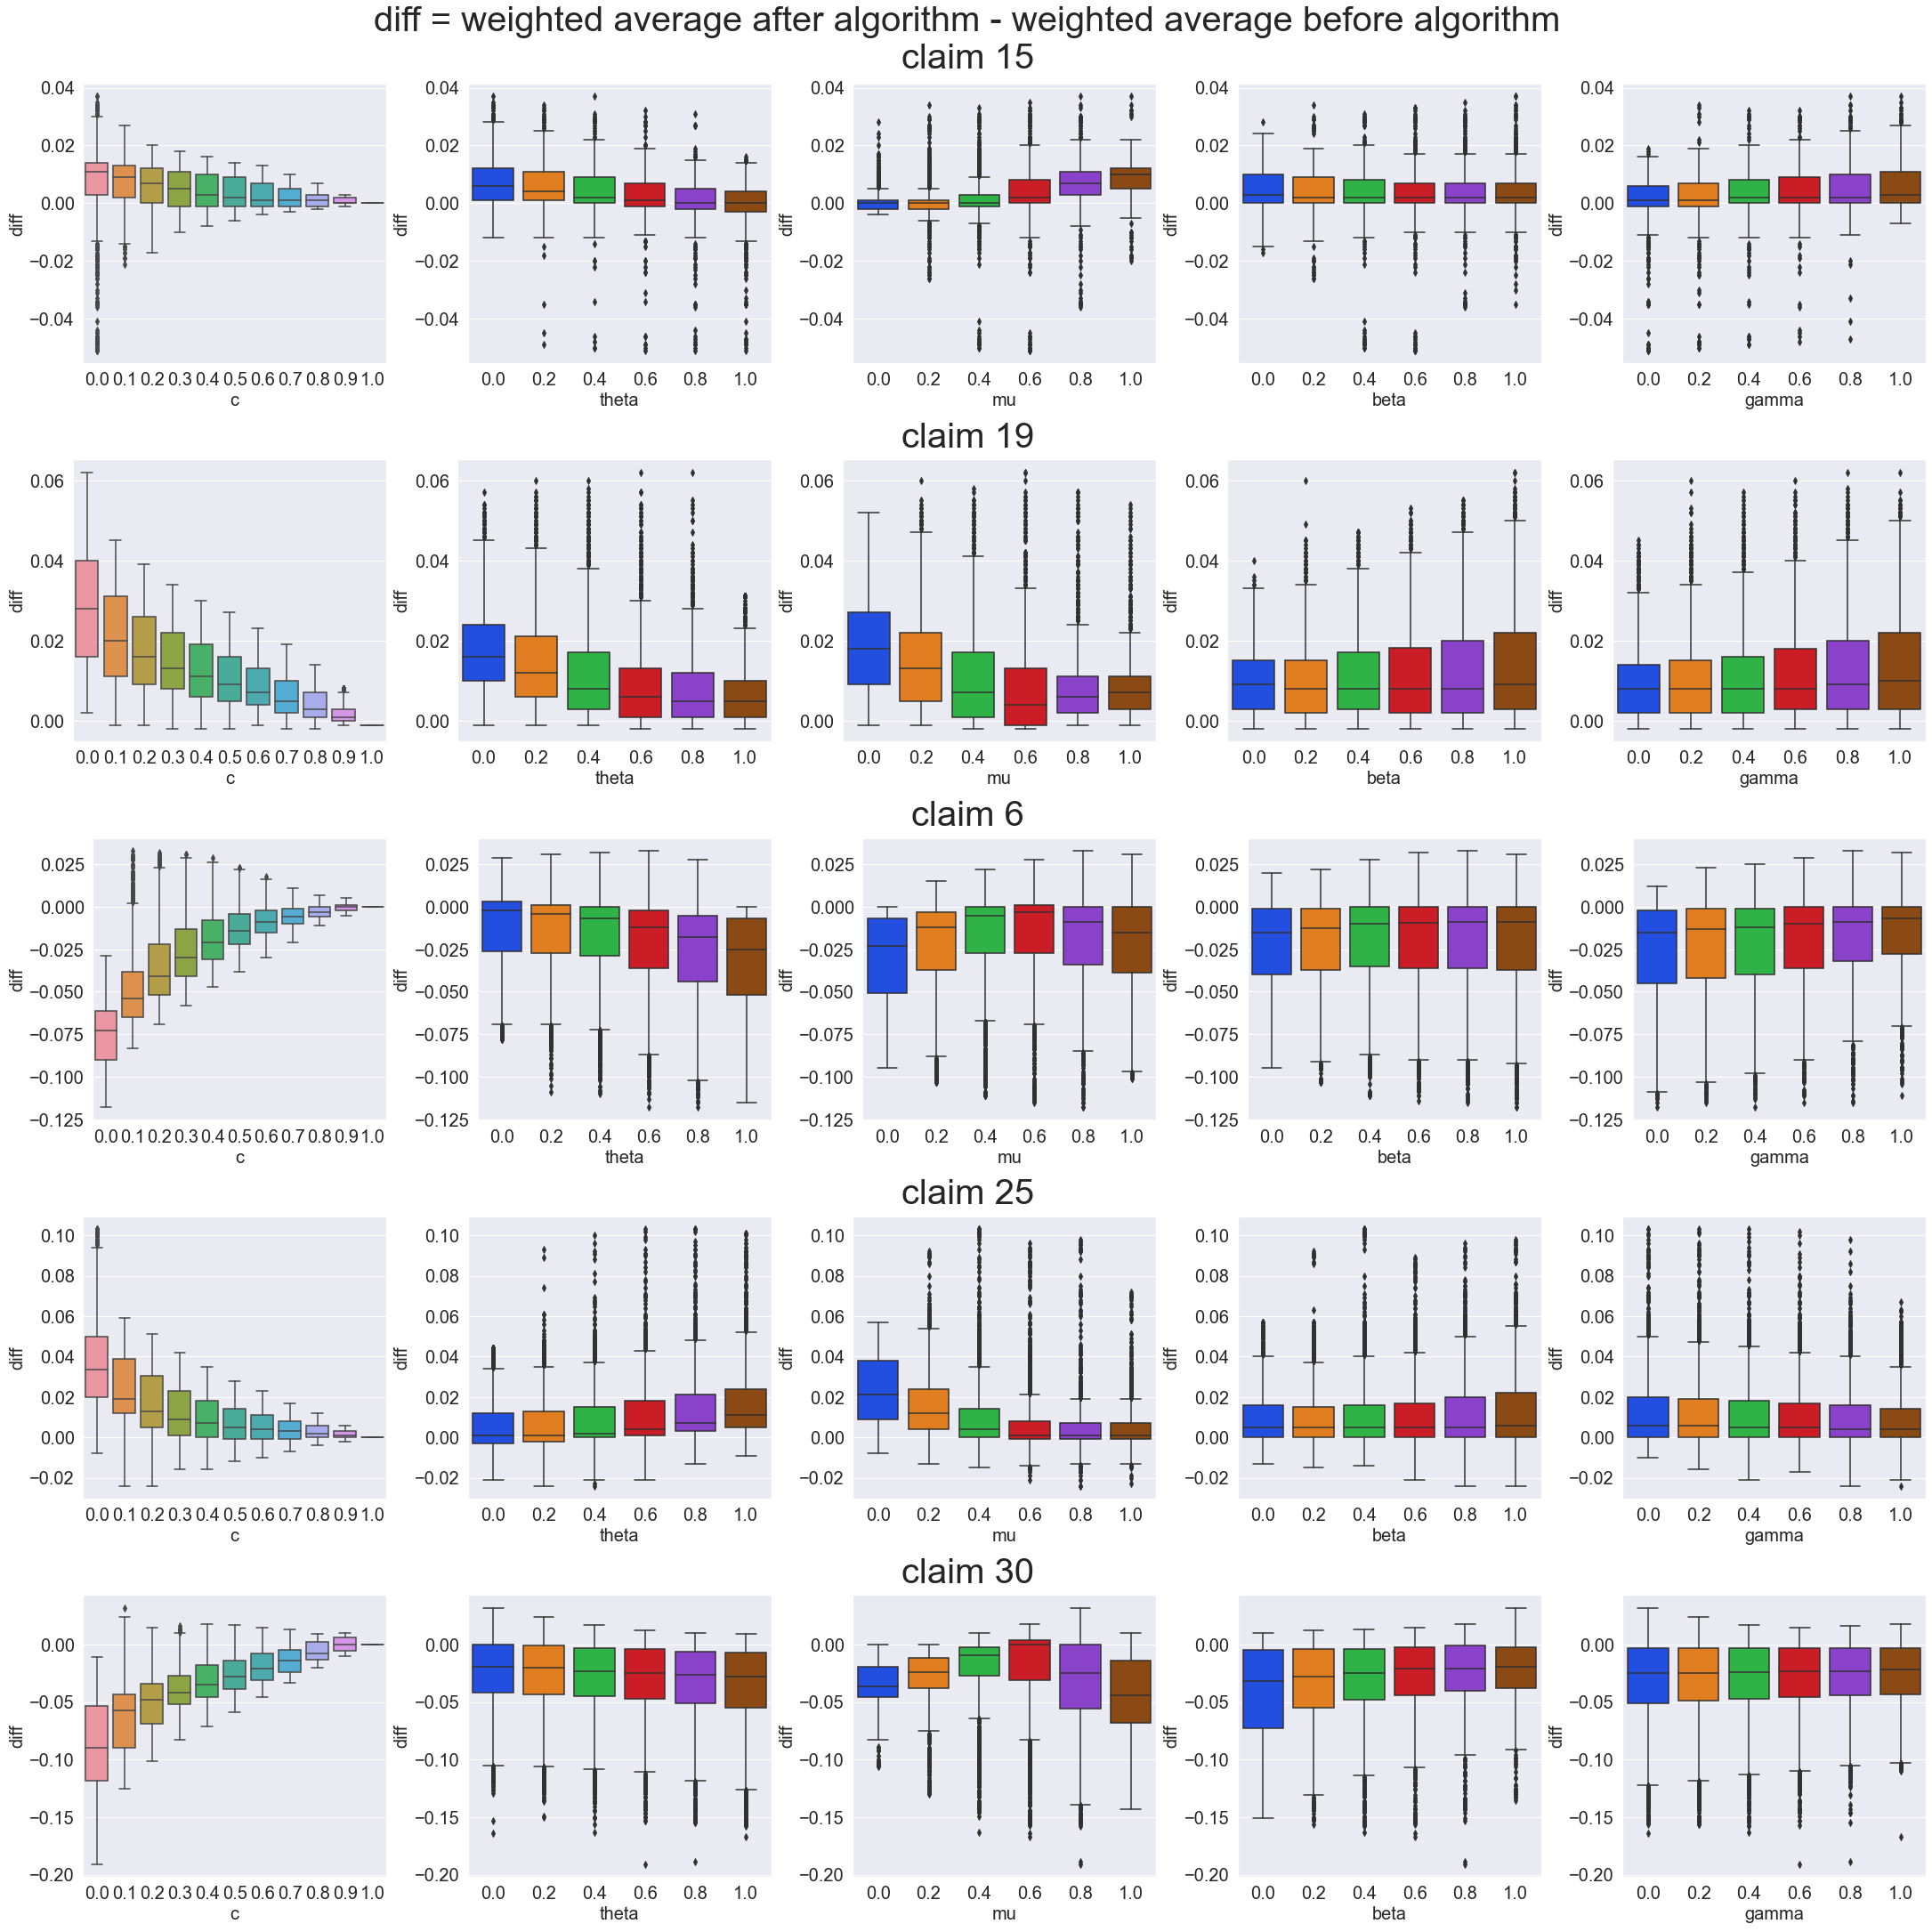

In [3]:
seed(4)

fig = plt.figure(constrained_layout=True, figsize=(30,30))
fig.suptitle(diff_text, fontsize=40)

cols = list(df.columns)
cols = cols[cols.index("claimID")+1:cols.index("majority")]
subfigs = fig.subfigures(nrows=5, ncols=1)
for subfig in subfigs:
    claim = randrange(36)
    subfig.suptitle(f"claim {claim}", fontsize=40)

    axs = subfig.subplots(nrows=1, ncols=len(cols))
    for i,col in enumerate(cols):
        sns.boxplot(x=col, y="diff", data=df[df["claimID"] == claim], ax=axs[i])

fig.savefig(os.path.join("figures",f"diff_params_{figure_suffix}.svg"))

In [4]:
df["prediction_m"] = (df.majority > 0).astype(int)
df["prediction_w"] = (df.weighted > 0).astype(int)
df["prediction_waa"] = (df.weightedAfterAlgorithm > 0).astype(int)
df["prediction_1_1_0"] = ((df.prediction_m == df.prediction_w) & (df.prediction_w != df.prediction_waa)).astype(int)
df["prediction_1_0_1"] = ((df.prediction_m == df.prediction_waa) & (df.prediction_waa != df.prediction_w)).astype(int)
df["prediction_0_1_1"] = ((df.prediction_m != df.prediction_w) & (df.prediction_w == df.prediction_waa)).astype(int)
df["prediction_1_1_1"] = ((df.prediction_m == df.prediction_w) & (df.prediction_w == df.prediction_waa)).astype(int)

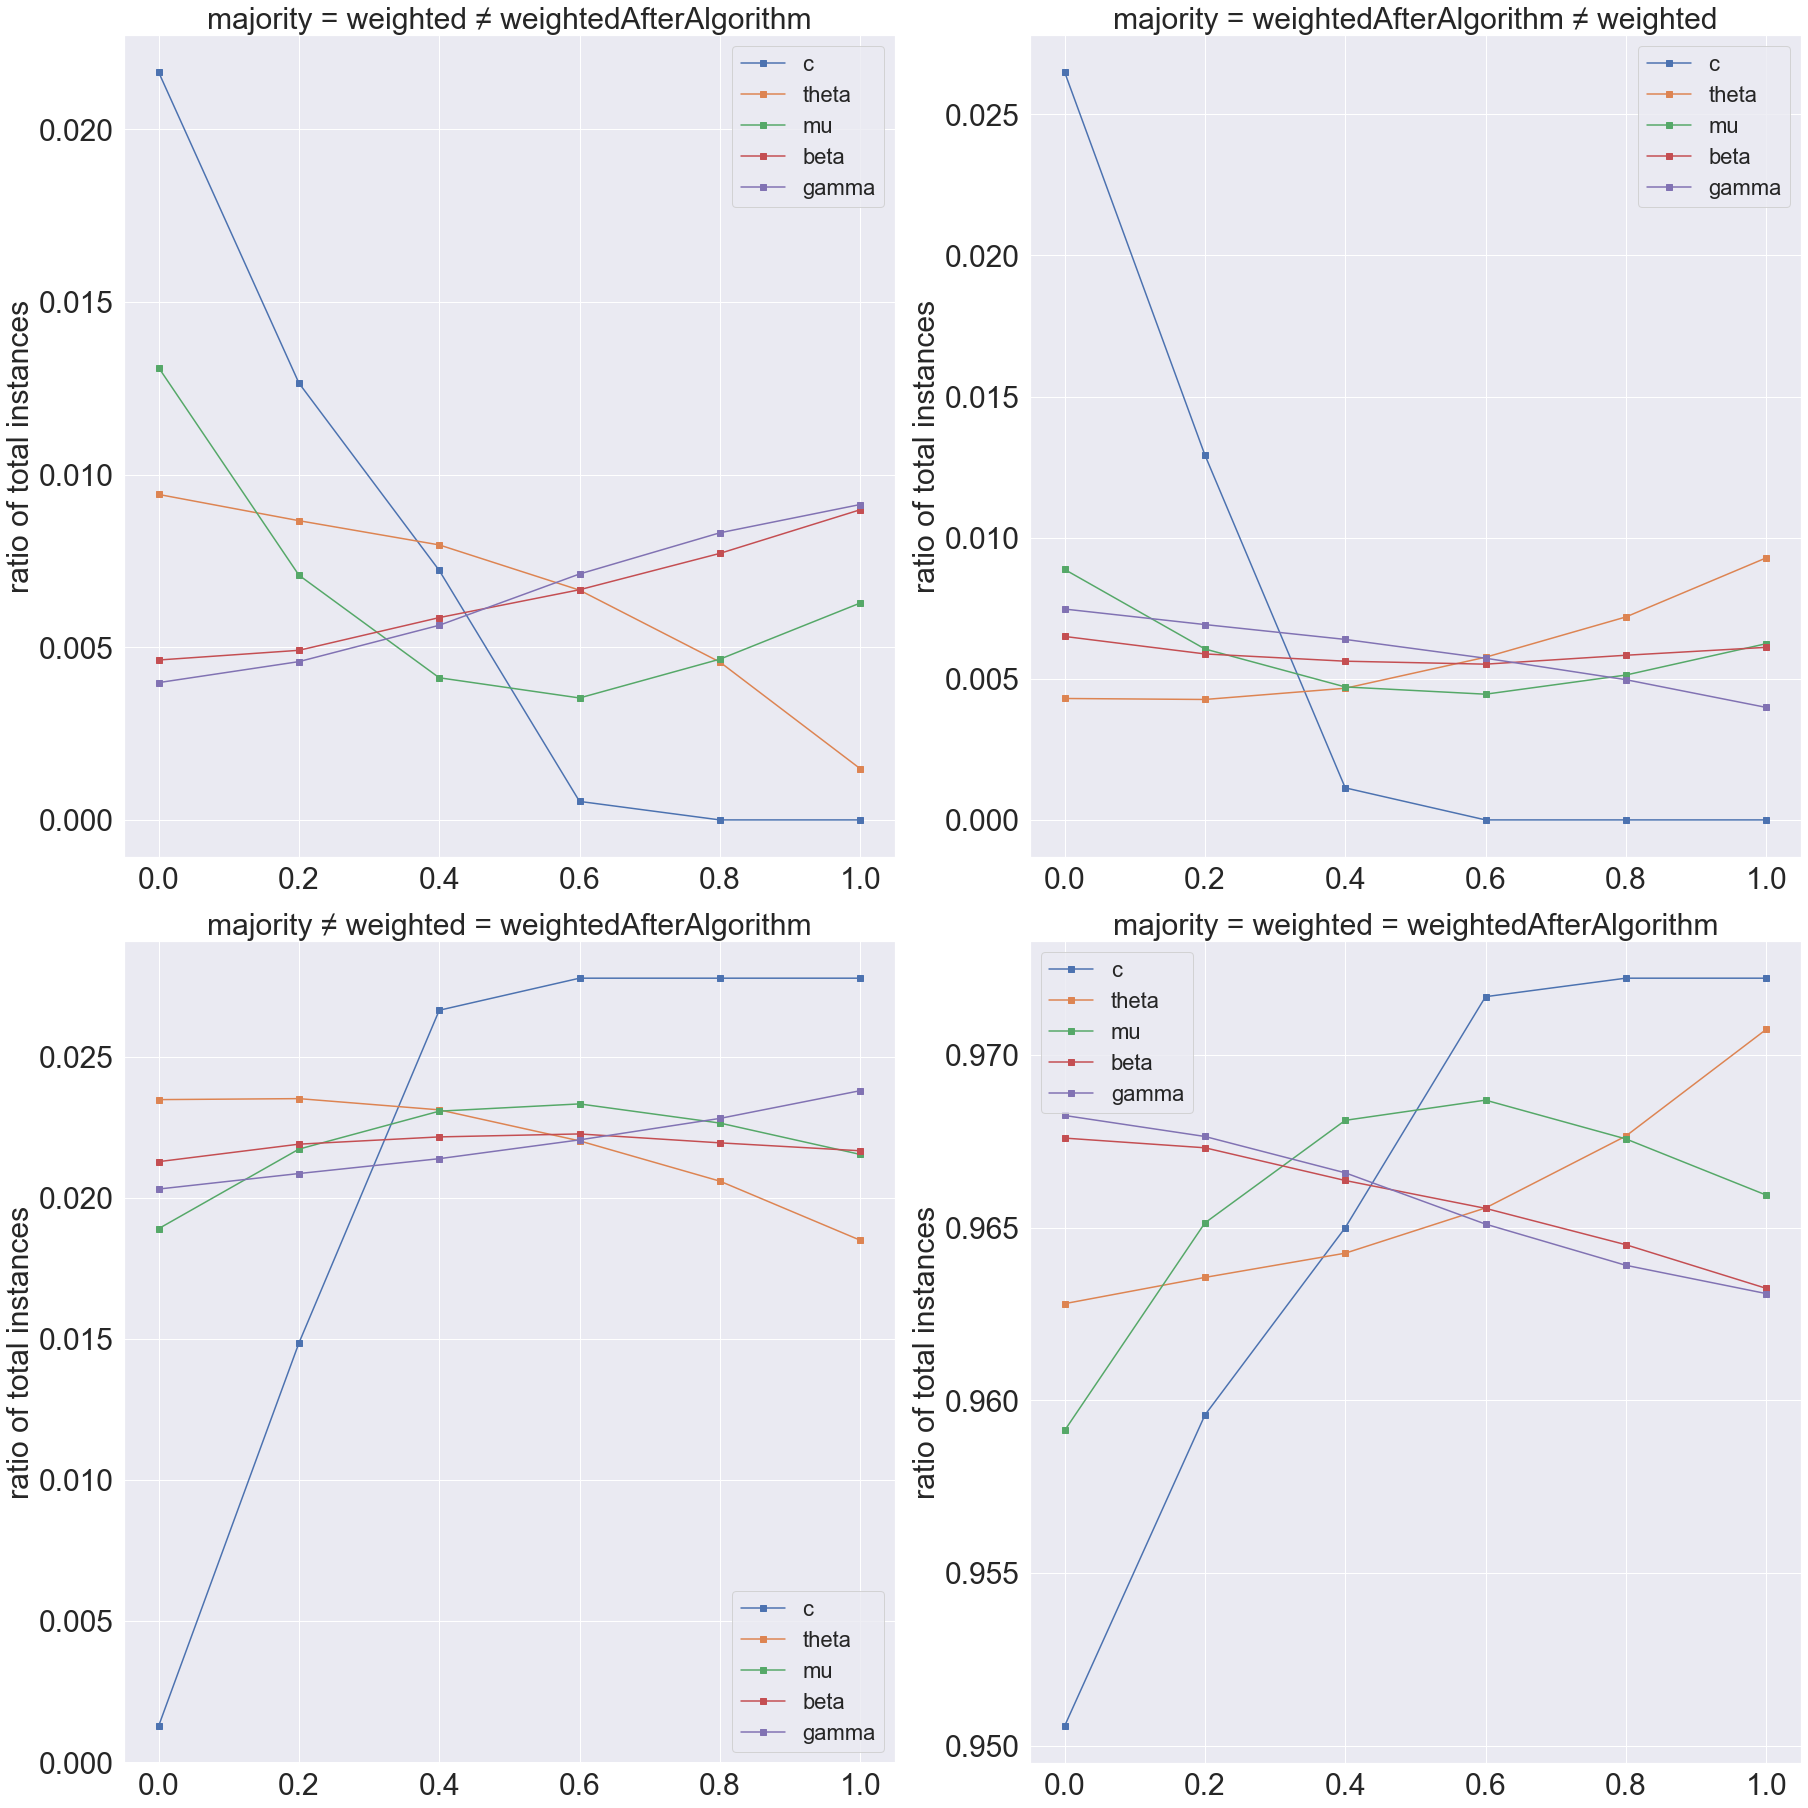

In [16]:
fig = plt.figure(constrained_layout=True, figsize=(25,25))
axes = fig.subplots(nrows=2, ncols=2)

pred_cols = ["prediction_1_1_0","prediction_1_0_1","prediction_0_1_1","prediction_1_1_1"]
titles = ["majority = weighted ≠ weightedAfterAlgorithm", "majority = weightedAfterAlgorithm ≠ weighted", "majority ≠ weighted = weightedAfterAlgorithm", "majority = weighted = weightedAfterAlgorithm"]

cols = list(df.columns)
cols = cols[cols.index("claimID")+1:cols.index("majority")]

for k,(i,j) in enumerate(np.ndindex(axes.shape)):    
    series = [df.groupby(col).mean()[pred_cols[k]] for col in cols]
    pred_diff = pd.concat(series, axis=1).dropna()
    pred_diff.columns = cols

    ax = axes[i,j]
    pred_diff.plot(title=titles[k], style="s-", ax=ax, fontsize=30)
    ax.set_ylabel("ratio of total instances", fontsize=30)
    ax.title.set_size(30)

fig.savefig(os.path.join("figures",f"agreement_{figure_suffix}.svg"))

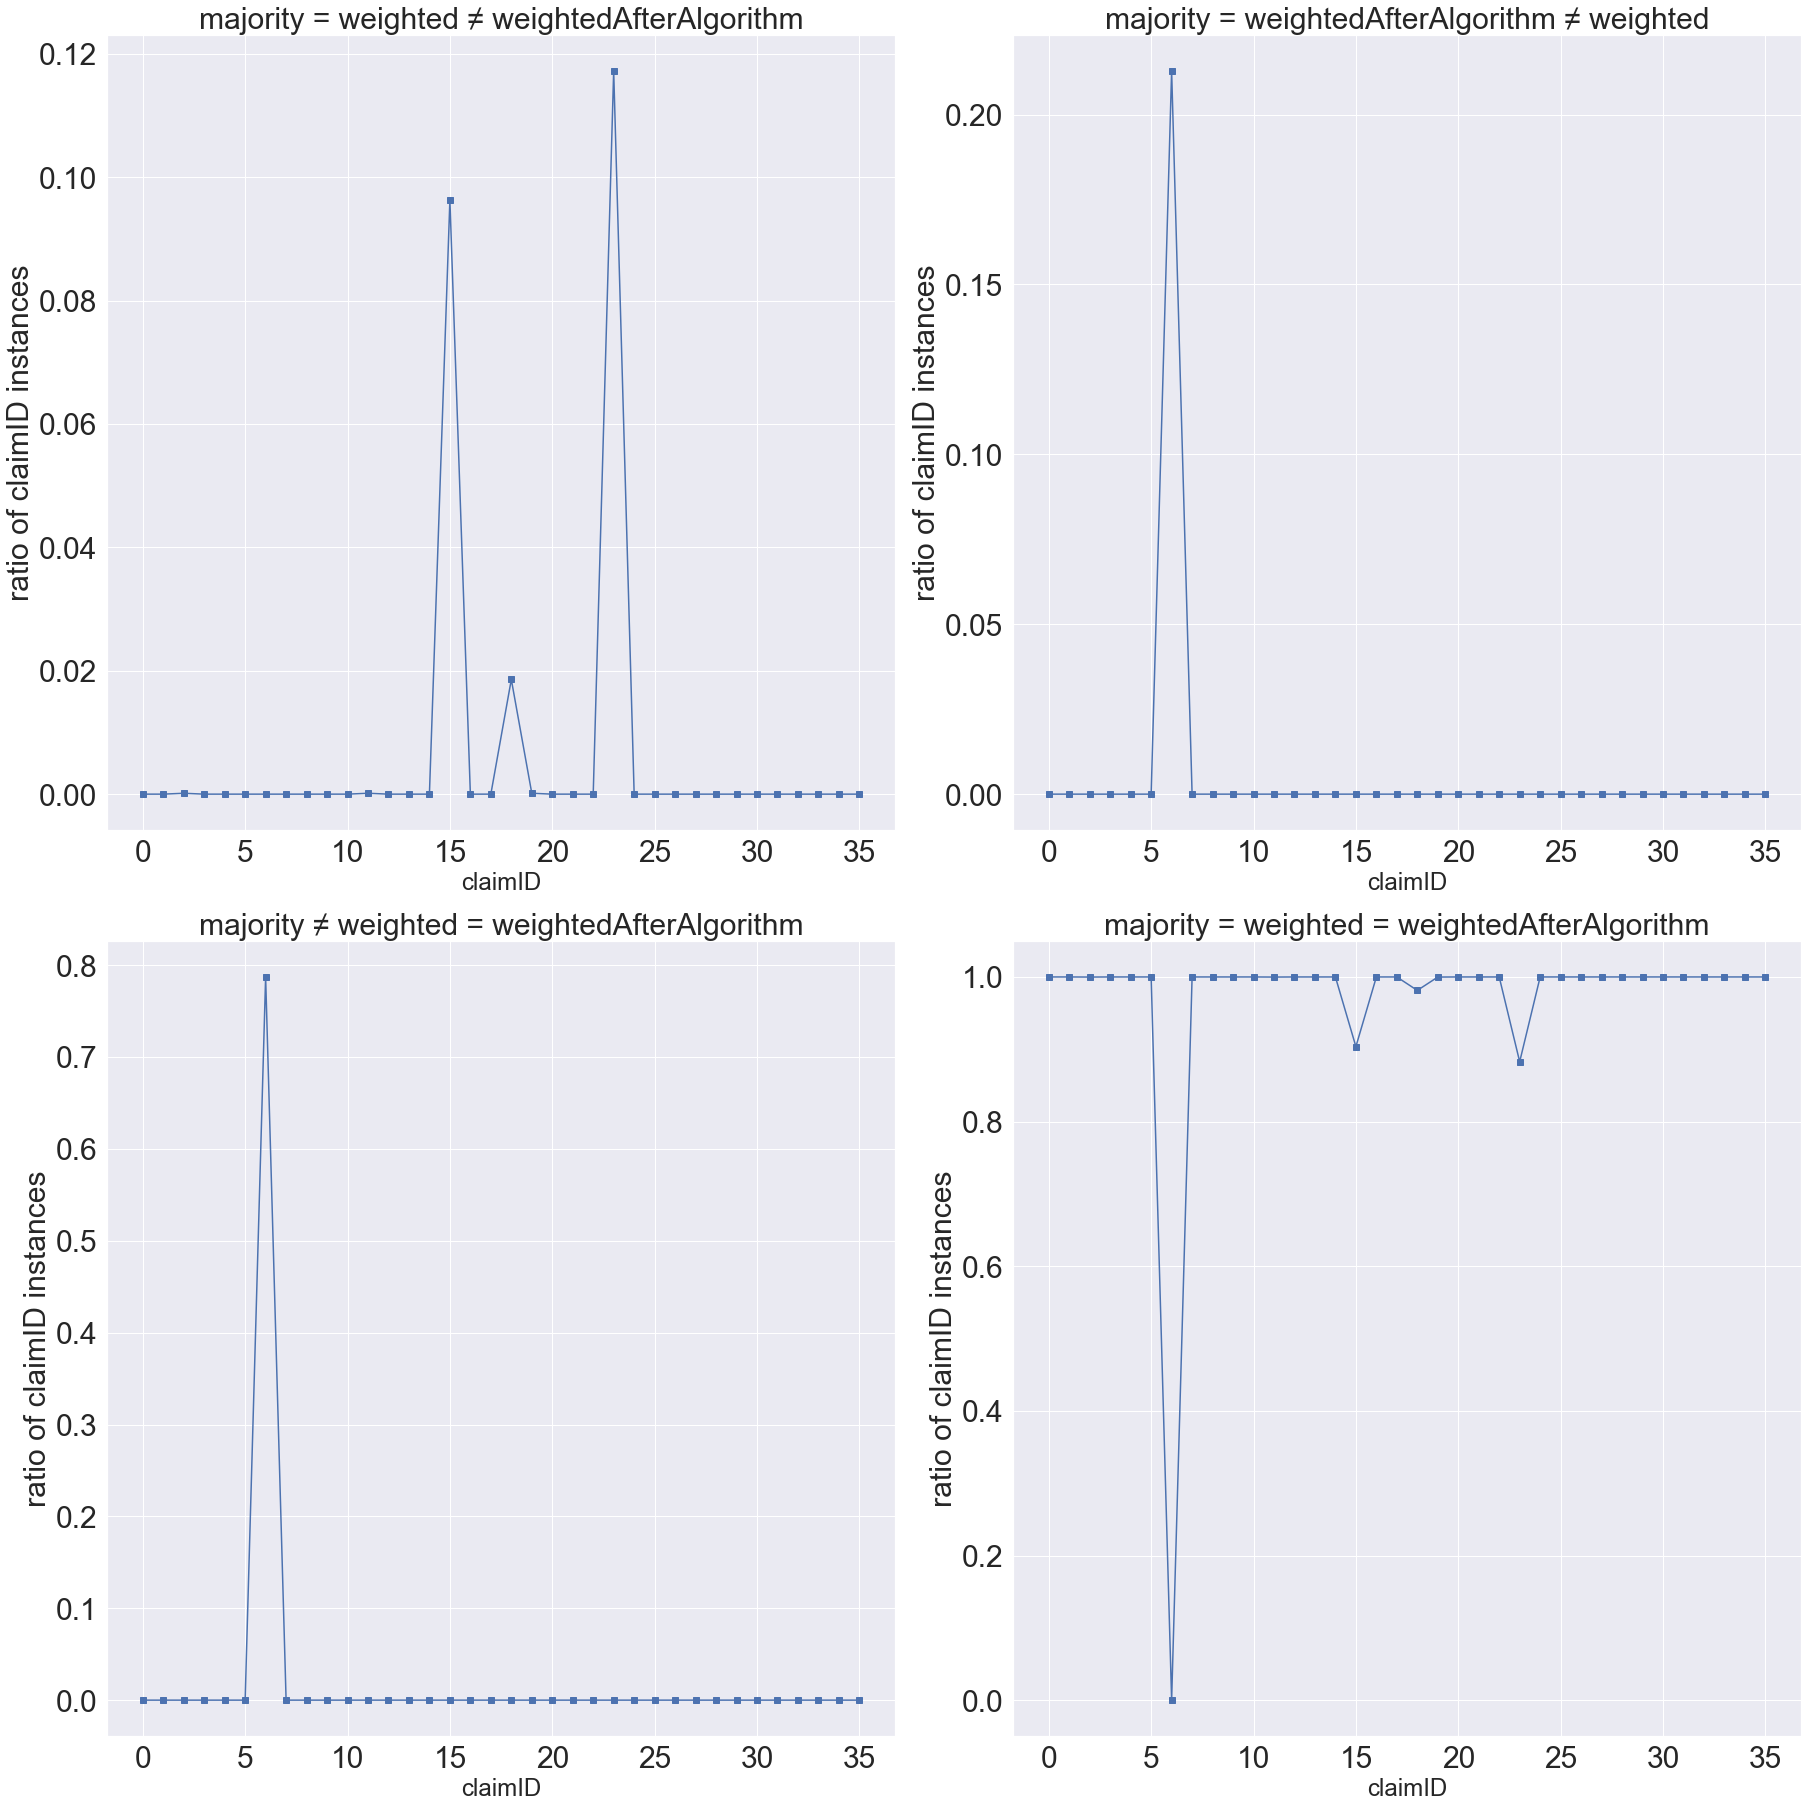

In [15]:
fig = plt.figure(constrained_layout=True, figsize=(25,25))
axes = fig.subplots(nrows=2, ncols=2)

pred_cols = ["prediction_1_1_0","prediction_1_0_1","prediction_0_1_1","prediction_1_1_1"]
titles = ["majority = weighted ≠ weightedAfterAlgorithm", "majority = weightedAfterAlgorithm ≠ weighted", "majority ≠ weighted = weightedAfterAlgorithm", "majority = weighted = weightedAfterAlgorithm"]

cols = list(df.columns)
cols = cols[cols.index("claimID")+1:cols.index("majority")]

for k,(i,j) in enumerate(np.ndindex(axes.shape)):    
    pred_diff = df.groupby("claimID").mean()[pred_cols[k]]
    
    ax = axes[i,j]
    pred_diff.plot(title=titles[k], style="s-", ax=ax, fontsize=30)
    ax.set_ylabel("ratio of claimID instances", fontsize=30)
    ax.title.set_size(30)

fig.savefig(os.path.join("figures",f"agreement_claimID_{figure_suffix}.svg"))

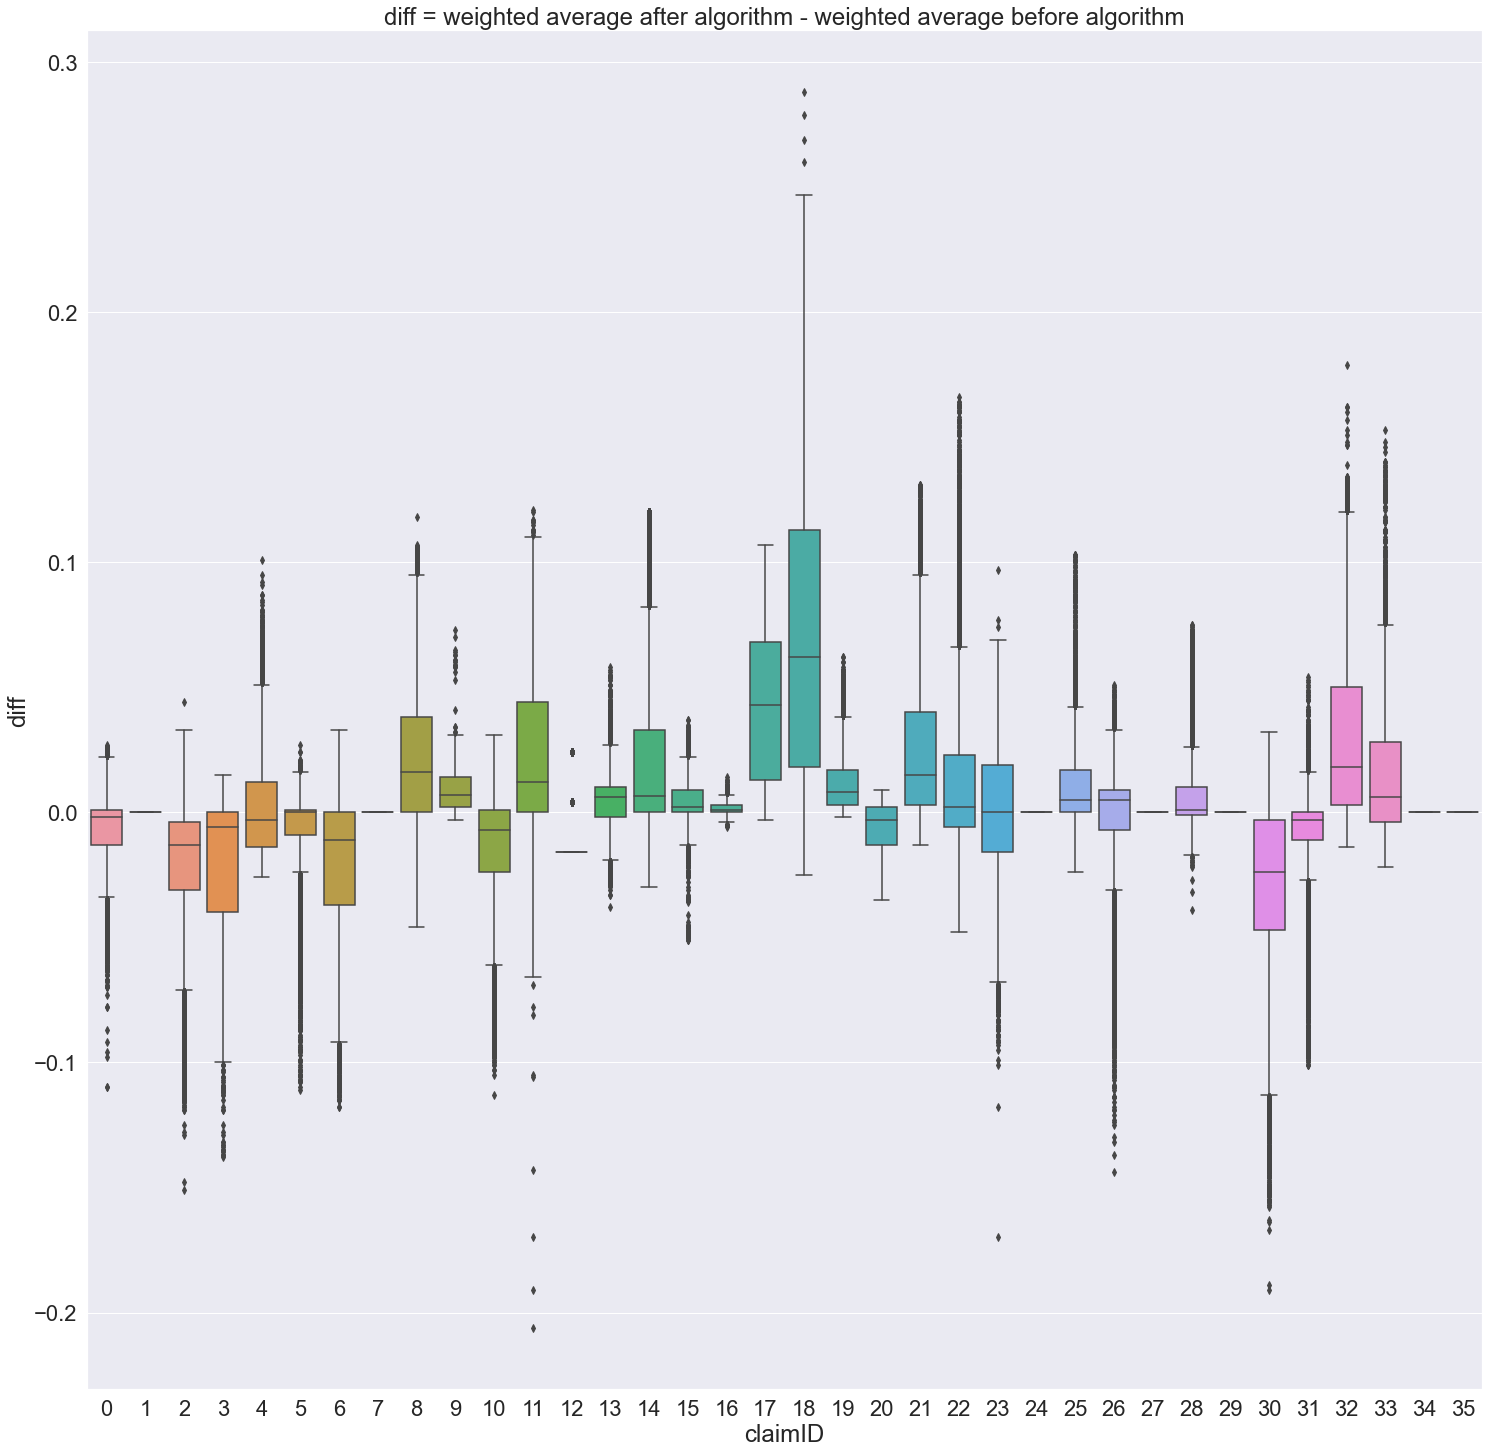

In [6]:
sns.set(rc = {'figure.figsize':(25,25)})
sns.set(font_scale = 2)
fig = sns.boxplot(x="claimID", y="diff", data=df)
fig.set_title(diff_text)
fig.get_figure().savefig(os.path.join("figures",f"diff_claimID_{figure_suffix}.svg"))